# Random Forest in Python
#### This is a practice of what's on https://youtu.be/6EXPYzbfLCE
#### Data is from http://archive.ics.uci.edu/ml/datasets/Heart+Disease
#### & http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/
#### (processed.cleveland.data)

In [1]:
# Read data
import pandas as pd
import numpy as np

Data = pd.read_csv('processed.cleveland.data', header=None, usecols=range(0,14),
                     names=['age',   'sex',     'cp',      'trestbps', 'chol',
                            'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                            'slope', 'ca',      'thal',    'hd'])

# If 'hd' is not zero, consider the patient has heart disease.
Data.loc[Data['hd']!=0,'hd']= 1

# 'ca' and 'thal' have '?'. Convert this to np.nan to impute later
Data.loc[Data.ca=='?','ca']=np.nan
Data.loc[Data.thal=='?','thal']=np.nan

# Cursory check
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
# Impute data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select complete data.
Data_Complete = Data[(Data['ca'].notna()) & (Data['thal'].notna())]
# Have the imputer ready.
imp = IterativeImputer(max_iter=10, random_state=2580)
imp.fit(Data_Complete)
# Impute the missing data.
Data_Missing = imp.transform(Data[(Data['ca'].isna()) | (Data['thal'].isna())])
Data_Missing = pd.DataFrame(data = Data_Missing,
                            columns =['age',   'sex',     'cp',      'trestbps', 'chol',
                                      'fbs',   'restecg', 'thalach', 'exang',    'oldpeak',
                                      'slope', 'ca',      'thal',    'hd'])
# Combine Complete and Missing
Data_Imputed = pd.concat([Data_Complete, Data_Missing]).reset_index(drop=True)
Data_Imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


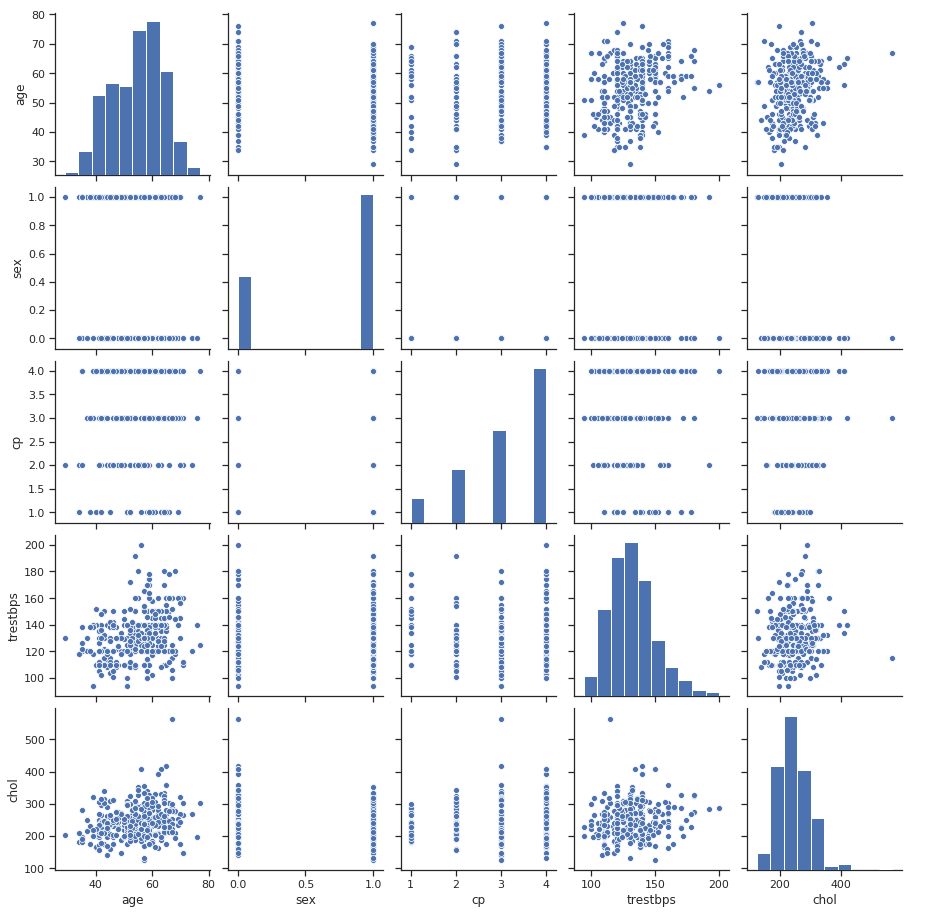

In [8]:
# Matrix plot
import seaborn as sns; sns.set(style="ticks", color_codes=True)
# get a few columns of BCdata.
Data_small = Data.iloc[:,:5]
g = sns.pairplot(Data_small)

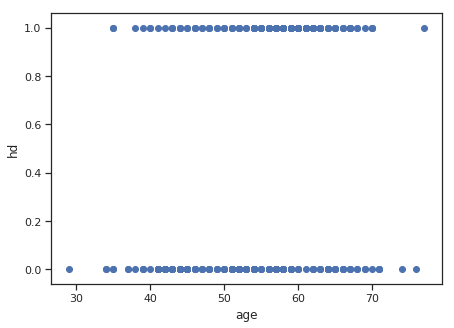

In [4]:
# Plot 'heart disease'(y) vs 'age'(x)
import matplotlib.pyplot as plt

x=Data['age']
y=Data['hd']

fig = plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('hd')
plt.show()

In [5]:
# Predict heart disease using the rest of data
# Load the randomForest library.
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, max_depth=3, oob_score=True, random_state=2580)
rfc.fit(Data_Imputed.iloc[:,:13], Data_Imputed.iloc[:,13])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=2580,
                       verbose=0, warm_start=False)

In [6]:
# Predict y using a new x.
print(rfc.predict([Data_Imputed.iloc[0,:13].to_numpy()]))

[0.]


In [7]:
# Check out-of-bag estimate score
rfc.oob_score_

0.8514851485148515